# Title:

by David Schneemann

## Project Goal

My goal with this project is to identify Telco's key drivers of customer churn and to provide insight into why and how these factors are producing churn. With this information and the following recommendations, our organization can work together to improve business processes and procedures in order to minimize customer churn moving forward.

## Project Description

## Initial Questions

##### 1. Do M2m customers churn more than 1-yr or 2-yr customers?
    
- Ho = M2M customers churn <= 1&2-yr customers
- Ha = M2M customers churn > 1&2-yr customers

##### 2. Does paying by electronic check influence churn?

- Ho = Electronic check churn <= other payment types
- Ha = Electronic check churns > other payment types

##### 3. Do single adults churn more than adults with partner?

- Ho = Single adults churn <= adults with partner
- Ha = Single adults churn > adults with partner

##### 4. Do adults with dependents churn more than adults without dependents?

- Ho = Adults with dependents churn <= adults without dependents
- Ha = Adults with dependents churn > adults without dependents

## Data Dictionary

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model

# Data acquisition
from pydataset import data

# Data statistics & modeling
from scipy import stats
from model import map_setosa_knn, train_validate_test_split

# Data
import prepare
import env
import prepare
import model
import acquire_telco
import split_telco

| Variable      | Meaning |
| ----------- | ----------- |
| Churn      | Defines whether a customer left their service contract       |
| Monthly Charges   | The average monthly charge per customer        |
| m2m      | Customers who have month to month contracts       |
| yr1      | Customers who have 1-yr contracts       |
| yr2      | Customers who have 1-yr contracts       |
| a_bank_transfer   | Customers who pay via bank transfer (automatic)       |
| a_ccard      | Customers who pay via credit card (automatic)      |
| e_check      | Customers who pay via electronic check       |
| m_check      | Customers who pay via mailed check       |
| p_w_d   | Defines customers who have both a partner and dependents        |
| p_no_d      | Defines customers who have a partner but no dependents|
| d_no_p      | Defines customers who have dependents but no partner  |
| no_pod      | Defines customers who have neither a partner nor dependents       |

## Wrangle Telco Data

To acquire the telco data, I used the telco_db in our mySQL server. I selected all columns from the customers table. I then joined this table with the contract_type, payment_type, and internet_service_type tables.

In [2]:
# py file to acquire data from sql database telco_db
import acquire_telco

# Utilizing our py file function 'get_telco_data' to return our table in the form of a dataframe
df = acquire_telco.get_telco_data()
df.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,...,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,...,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,...,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


To clean the data, I did the following:

1. Drop Duplicate Columns: "id" columns such as 'payment_type_id' are duplicates and don't serve a purpose in our table, thus I removed them.
2. Transforming numerical variables: 'total_charges' has whitespace removed and is converted into the appropriate datatype
3. Encoding binary categorical variables: Variables like 'gender', 'partner', and 'dependents' (among others) need to be encoded numerically for exploration and analysis purposes
4. Dummy vars: I attained dummy variables for 'multiple_lines',security choices, streaming choices, and other variables such as 'contract_type'.
5. Concatenate dummy df with original df: I concat our df to include our dummy variables
6. Feature engineering: In order to perform proper exploration and analysis, I create additional features that break down existing variables into more concise values that pinpoint potential causes of churn

In [3]:
# I acquire my prepare.py file, this file includes data cleaning instructions
import prepare

In [4]:
# Utilizing our py file function 'prep_telco_data' to return our dataframe tidy and clean 
df = prepare.prep_telco_data(df)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,partner_w_dependents,partner_no_dependents,dependents_no_partner,no_pod,male_w_dependents,female_w_dependents,number_relationships
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,1,1,0,0,0,0,0,2
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,1,0,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,0,0,0,0,1,0,0,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,0,1,0,0,1,0,0,0,0,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,0,1,0,1,0,0,0,0,1


For simplicity, I have separated my 'prepare' and 'split' files. My 'split' file includes functions that split our dataset into train, validate, and test dataframes that allow appropriate statistical analysis.

In [5]:
# acquiring and implementing my 'split' py file and accompanying function
import split_telco

# calling the function and applying it to our df
train, validate, test = split_telco.telco_split_explore(df)

In [6]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,partner_w_dependents,partner_no_dependents,dependents_no_partner,no_pod,male_w_dependents,female_w_dependents,number_relationships
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,1,0,0,0,0,0,1,0,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,1,0,0,0,0,1,0,1,0,1
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,0,0,0,2
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,0,1,1,0,0,0,0,0,2
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,1,0,0,0,1,0,0,0


## Set the Data Context

Our dataset contains customer information from Telco Company.

26.6% of customers churned. We have data from 7032 customers, 3875 of which are month to month customers, 2365 of which payed by electronic check, and 3280 of which are single adults (no partner or dependents). The average monthly charge for all customers was $64.80.

In [ ]:
### viz here setting the context of the data

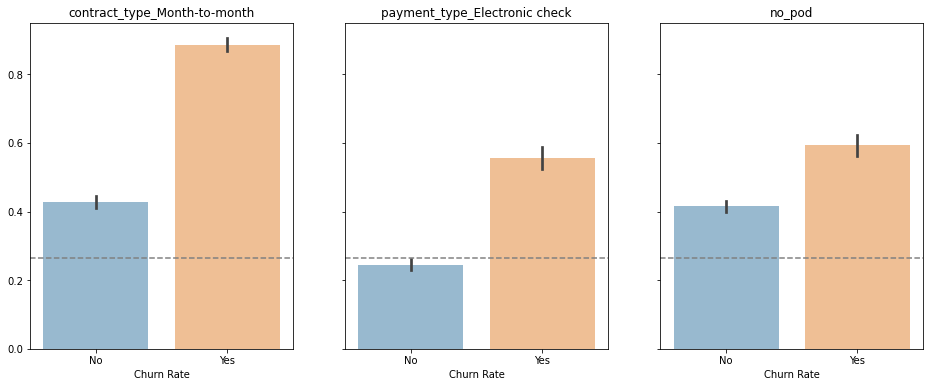

In [8]:
features = ['contract_type_Month-to-month', 'payment_type_Electronic check', 'no_pod']

enumerate(features)

list(enumerate(features))

churn_rate = train.churn_encoded.mean()
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn Rate')
    ax[i].set_ylabel('')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Exploratory Analysis: [question]

I have answered these questions:

1. Do M2m customers churn more than 1-yr or 2-yr customers?
2. Does paying by electronic check influence churn?
3. Do single adults churn more than adults with partner?
4. Do adults with dependents churn more than adults without dependents?

### Question 1

[Elaborate]

### Answer 1

### Question 2

[Elaborate]

### Answer 2

### Question 3

[Elaborate]

### Answer 3

### Summary: 

[features i will move forward with]

# Visuals

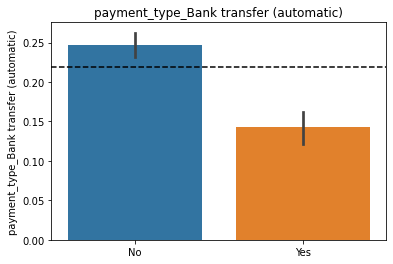

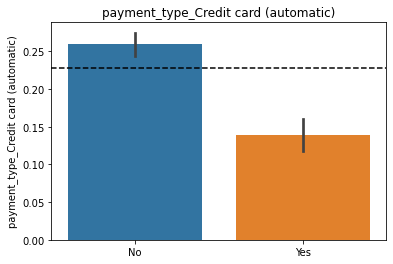

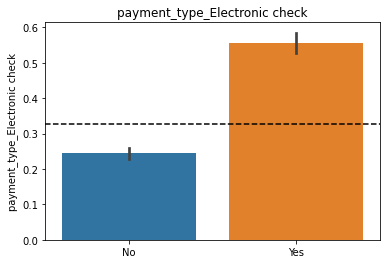

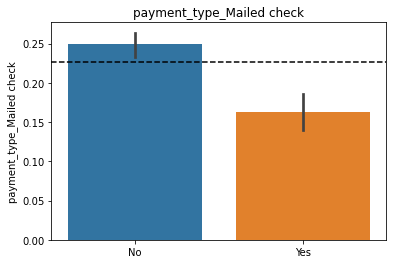

In [7]:
## Q2: Electronic Check vs. other payment types
variables = ['payment_type_Bank transfer (automatic)', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

mean = [train['payment_type_Bank transfer (automatic)'].mean(), train['payment_type_Credit card (automatic)'].mean(), train['payment_type_Electronic check'].mean(), train['payment_type_Mailed check'].mean()]

for x in range(0,4):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

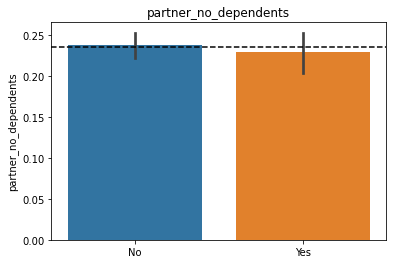

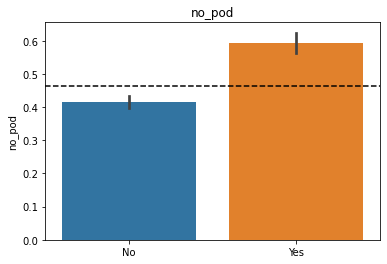

In [9]:
## Q3: Single adults vs. adults with partner
variables = ['partner_no_dependents', 'no_pod']

mean = [train['partner_no_dependents'].mean(), train['no_pod'].mean()]

for x in range(0,2):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

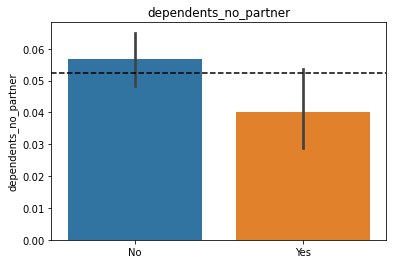

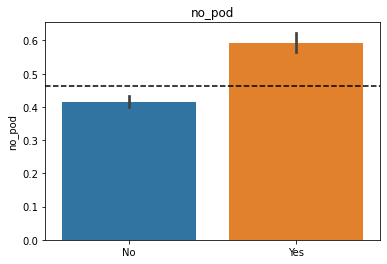

In [10]:
## Q4: Adults with dependents vs. Adults without dependents
variables = ['dependents_no_partner', 'no_pod']

mean = [train['dependents_no_partner'].mean(), train['no_pod'].mean()]

for x in range(0,2):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

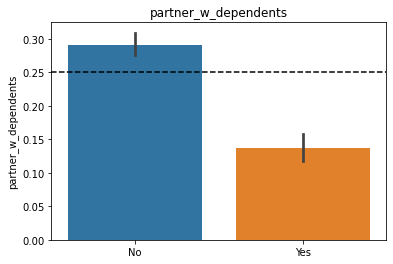

In [11]:
## Q4 (continued): comparing all against partner+dependents
variables = ['partner_w_dependents']

mean = [train['partner_w_dependents'].mean()]

for x in range(0,1):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

## Predicting Churn

WRITE IN OWN WORDS: Because survival is a boolean/yes or no value, we will use classification machine learning algorithms to fit to our training data and we will evaluate on validate. We will pick the best model using accuracy because the data is mostly balanced, and the risk of an event happening balances the risk of getting a prediction wrong.



#### Baseline

### Fit 3 models

... the top 3 models I built were:

WRITE IN OWN WORDS: I expect this model to perform with x% accuracy in the future on data it has not seen, given no major changes in our data source.

## Conclusion

### Summary

### Recommendations

### Next Steps